#**Assignment 8**

In [174]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns

##**Least Squares Regression**

###**Direct inverse method**

In [175]:
# generate x and y
x = np.random.normal(10,5,101)
e = np.random.normal(0,1,101)
y = x+e

# assemble matrix A
A = np.vstack([x,np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[0.96841401]
 [0.26029901]]


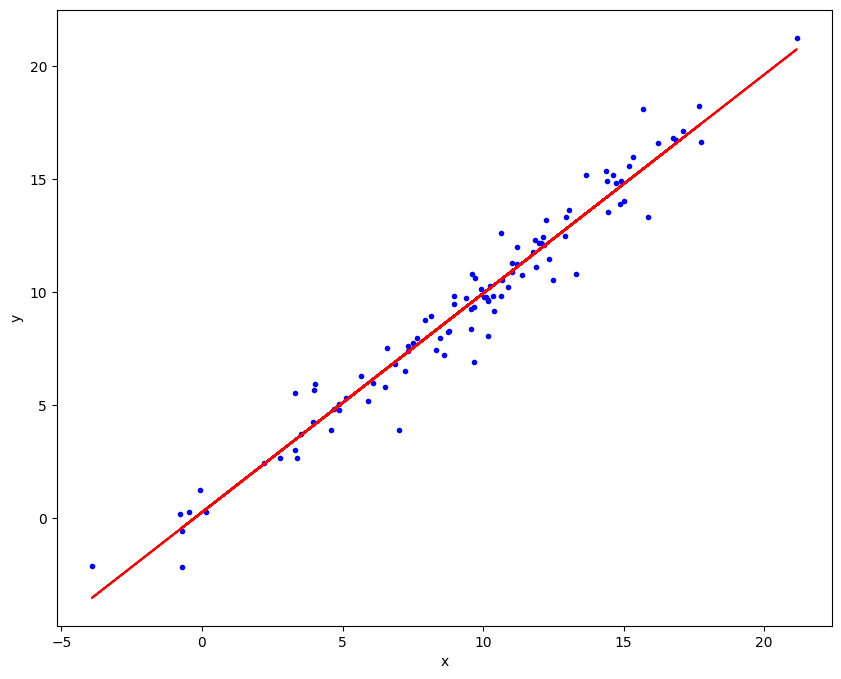

In [176]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

###**Pseudo inverse**

In [177]:
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[0.96841401]
 [0.26029901]]


###**numpy.linalg.lstsq**

In [178]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

[[0.96841401]
 [0.26029901]]


###**optimize.curve_fit from scipy**

In [179]:
# generate x and y
x = np.random.normal(10,5,101)
e = np.random.normal(0,1,101)
y = x+e

def func(x, a, b):
    y = a*x + b
    return y

alpha = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(alpha)

[0.98070835 0.19079998]


##**Least square regresion for nonlinear functions**

###**Log tricks for exponential functions**

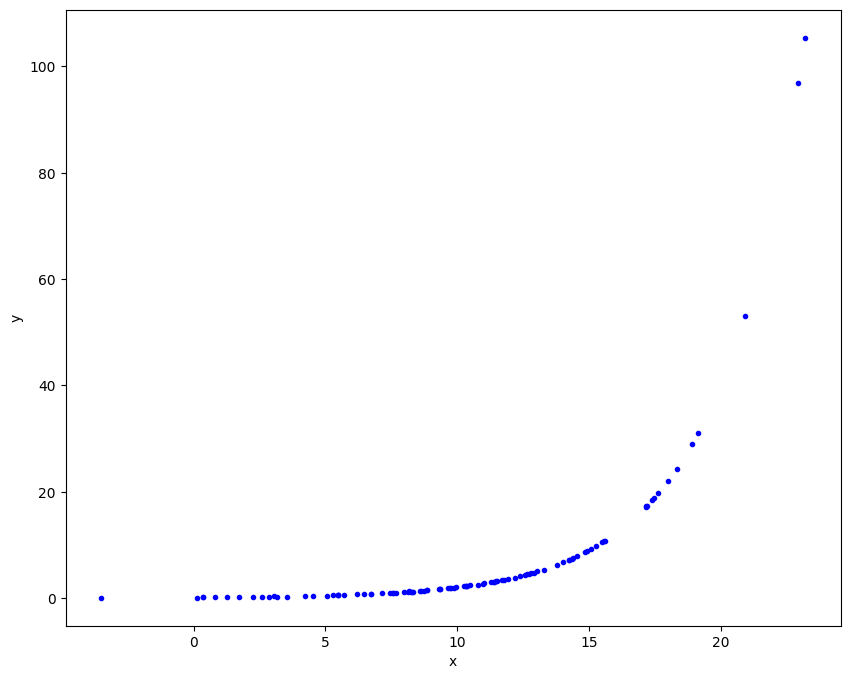

In [180]:
# Generate x and y, and add some noise into y
x = np.random.normal(10,5,101)
x = np.sort(x)
y = 0.1*np.exp(0.3*x) + 0.1*np.random.random(len(x))

# Plotting the data
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [181]:
A = np.vstack([x, np.ones(len(x))]).T
beta, log_alpha = np.linalg.lstsq(A, np.log(y), rcond = None)[0]
alpha = np.exp(log_alpha)
print(f'alpha={alpha}, beta={beta}')

alpha=0.12801593203001713, beta=0.2824910237926606


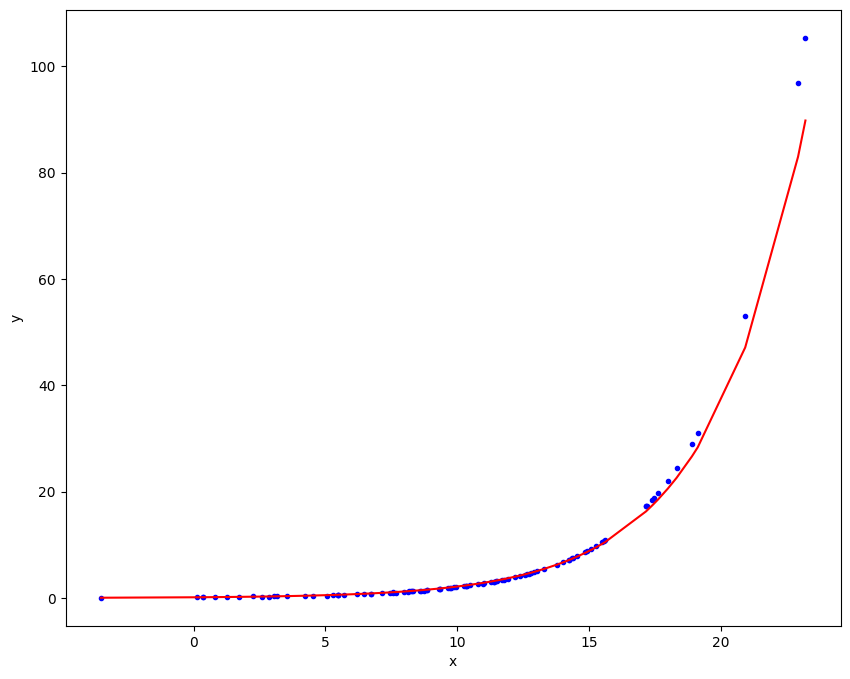

In [182]:
# Plotting the data
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha*np.exp(beta*x), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##**Polynomial regression**

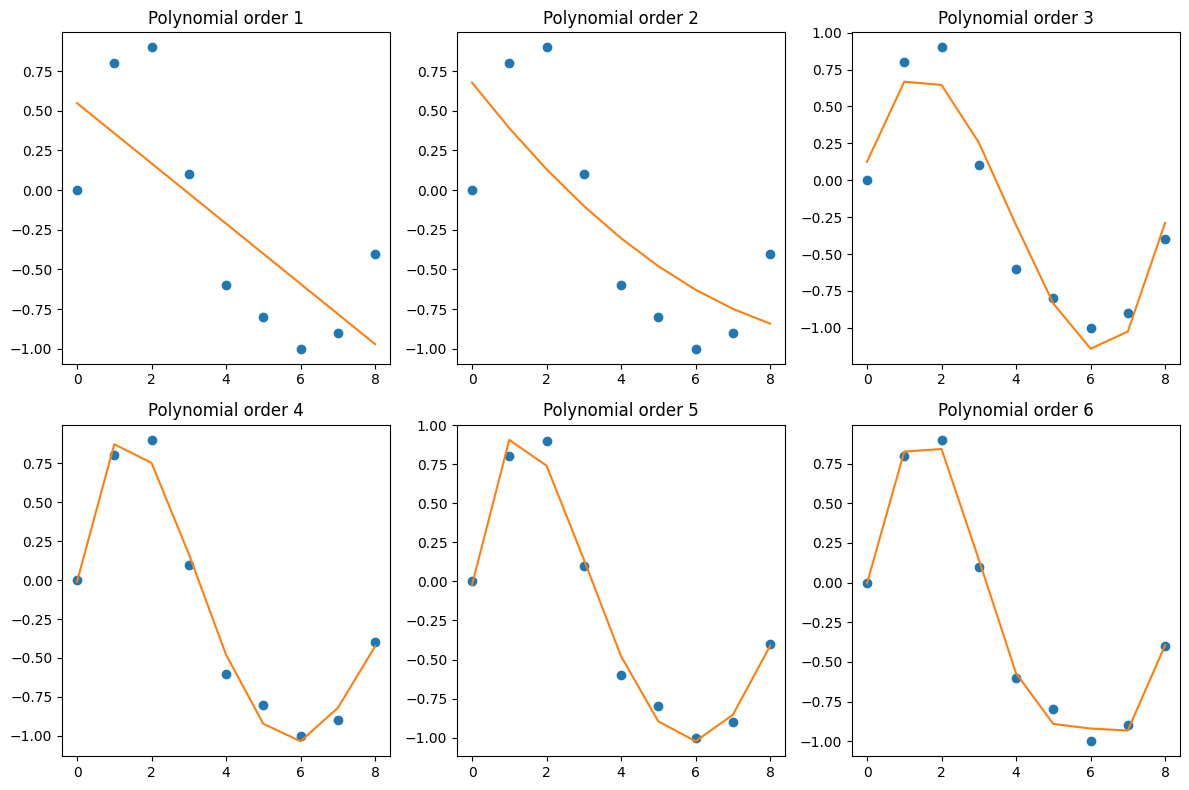

In [183]:
x_d = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
y_d = np.array([0, 0.8, 0.9, 0.1, -0.6, -0.8, -1, -0.9, -0.4])

plt.figure(figsize = (12, 8))
for i in range(1, 7):

    # get the polynomial coefficients
    y_est = np.polyfit(x_d, y_d, i)
    plt.subplot(2,3,i)
    plt.plot(x_d, y_d, 'o')
    # evaluate the values for a polynomial
    plt.plot(x_d, np.polyval(y_est, x_d))
    plt.title(f'Polynomial order {i}')

plt.tight_layout()
plt.show()

###**optimize.curve_fit from scipy**

In [184]:
#Defining function of the norm
def func(x, a, b):
    y = a*np.exp(b*x)
    return y

alpha, beta = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(f'alpha={alpha}, beta={beta}')

alpha=0.10184432798766335, beta=0.2992107954599842


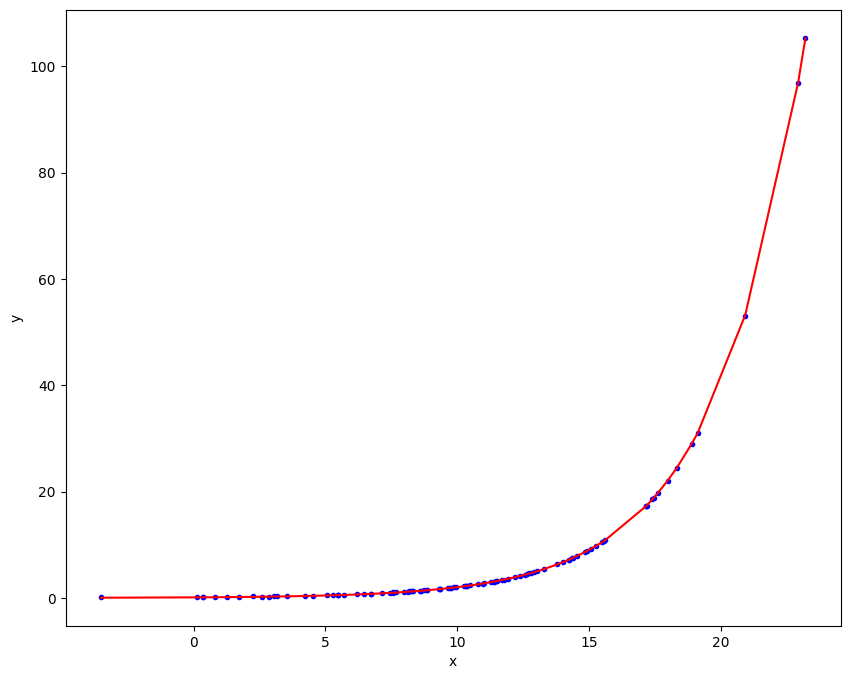

In [185]:
#Plotting the data
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha*np.exp(beta*x), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()